<a href="https://colab.research.google.com/github/Aishwarya-RaviK/Machine-Learning-Algo-Task7/blob/main/Logistic_Regression_Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder 
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])

In [ ]:
cols=['User ID','Gender']
df.drop(cols,axis=1,inplace=True)

In [ ]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

**Splitting the dataset into the Training set and Test set**

In [ ]:
X=df[['Age','EstimatedSalary']]
y=df[['Purchased']]
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
X_train.shape

(320, 2)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [ ]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Step 3 | Predection**

In [ ]:
y_pred=model.predict(X_test)
print(model.coef_) 
print(model.intercept_)

[[2.28149949 1.18065353]]
[-0.89033754]


**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Accuracy**

In [ ]:
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score

In [ ]:
model.score(X_test,y_test)

0.9

**Making the Confusion Matrix**

In [ ]:
c_mat=confusion_matrix(y_test,y_pred)
c_mat

array([[54,  5],
       [ 3, 18]])

In [ ]:
f1_score(y_test,y_pred)

0.8181818181818182

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


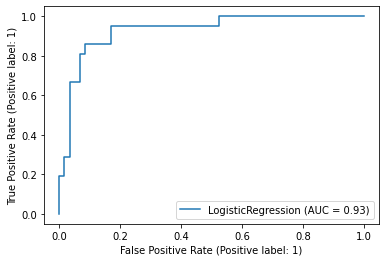

In [ ]:
plot_roc_curve(model,X_test,y_test)

**Visualization**

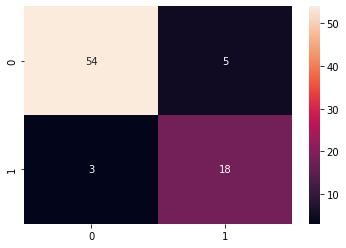

In [ ]:
sns.heatmap(c_mat,annot=True)

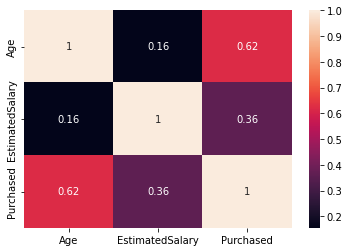

In [ ]:
corr_mat=df['Age'].corr()
sns.heatmap(corr_mat,annot=True)

There is considerate correlation between age and purchased and also estimated salary and purchased.